In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model

In [5]:
TD = pd.read_csv('TrainData.csv')
TD['Index'] = TD.index
display(TD)

,TIMESTAMP,POWER,U10,V10,WS10,U100,V100,WS100,Index
0,20120101 1:00,0.273678,0.534894,-3.660243,3.699120,0.765355,-4.486657,4.551468,0
1,20120101 2:00,0.086796,0.330813,-2.676430,2.696797,0.469875,-3.213752,3.247920,1
2,20120101 3:00,0.006811,-0.065839,-2.029072,2.030140,-0.020893,-2.418119,2.418209,2
3,20120101 4:00,0.018646,-0.419549,-1.799090,1.847362,-0.444867,-2.149654,2.195203,3
4,20120101 5:00,0.034812,-0.754224,-1.661526,1.824698,-0.838274,-1.991829,2.161038,4
...,...,...,...,...,...,...,...,...,...
16075,20131031 20:00,0.101254,-1.459917,-1.778960,2.301316,-1.974368,-4.936280,5.316483,16075
16076,20131031 21:00,0.105047,-1.293326,-2.350447,2.682777,-0.781394,-4.903565,4.965433,16076
16077,20131031 22:00,0.145079,-0.308284,-2.441885,2.461269,0.257905,-4.027432,4.035681,16077
16078,20131031 23:00,0.180933,1.148765,-2.789011,3.016330,1.628004,-3.520358,3.878572,16078


# Linear Regression Method

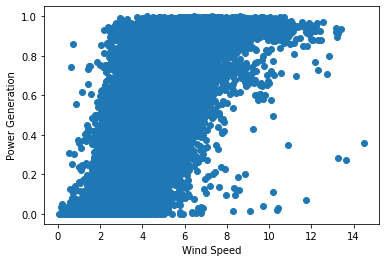

In [6]:
y = TD['POWER']
x = TD['WS10']


plt.scatter(x,y)
plt.xlabel('Wind Speed')
plt.ylabel('Power Generation')
plt.show()

In [7]:
X = TD['WS10'].values
Y = TD['POWER'].values

mean_X = np.mean(X)
mean_Y = np.mean(Y)

n = len(X)

numer = 0
denom = 0
for i in range(n):
    numer += (X[i] - mean_X) * (Y[i] - mean_Y)
    denom += (X[i] - mean_X) ** 2
b1 = numer / denom
b0 = mean_Y - (b1 * mean_X)

print(b1, b0)

0.12259335914949968 -0.08367458093320862


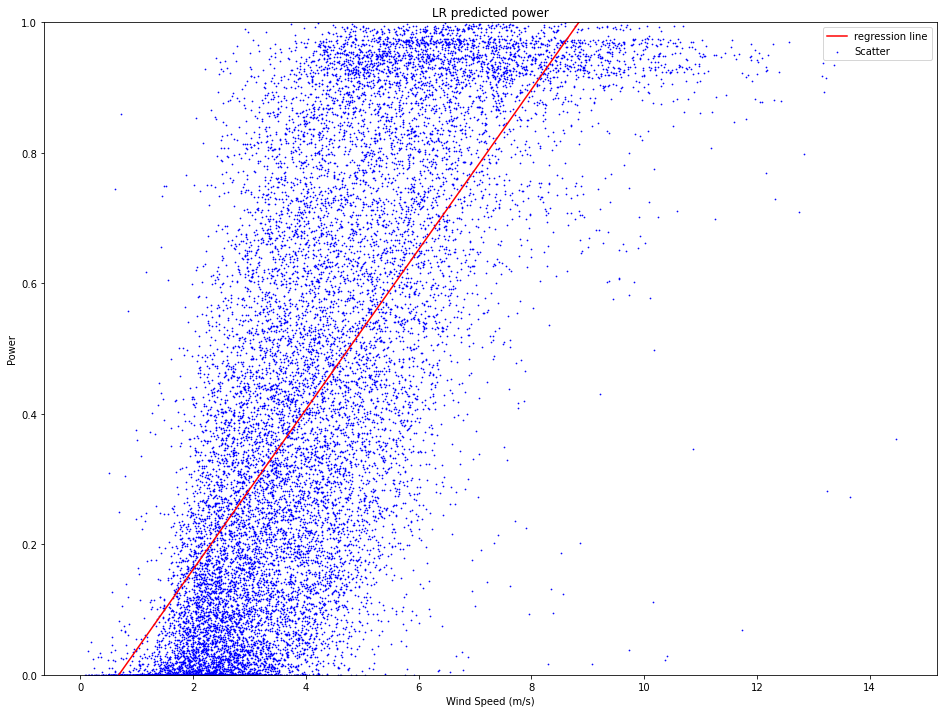

In [19]:
max_x = np.max(X)
min_x = np.min(X)

x = np.linspace(min_x, max_x, 10)
y = b0 + b1*x

LR_LINE = y

plt.plot(x,y, color='r', label='regression line')

plt.scatter(X,Y,s=0.5,color='b', label='Scatter')

plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Power')
plt.title('LR predicted power')
plt.ylim(0,1)
plt.legend()
plt.show()

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import math

'''
X = X.reshape((n,1))

reg = LinearRegression()

reg = reg.fit(X,Y)

Y_pred = reg.predict(X)

rmse = reg.score(X,Y)

print(rmse)
'''


'\nX = X.reshape((n,1))\n\nreg = LinearRegression()\n\nreg = reg.fit(X,Y)\n\nY_pred = reg.predict(X)\n\nrmse = reg.score(X,Y)\n\nprint(rmse)\n'

# Power generationfor November 2013

In [14]:
WFI = pd.read_csv('WeatherForecastInput.csv')
SOL = pd.read_csv('Solution.csv')
#WFI['datetime'] = pd.to_datetime(WFI['TIMESTAMP'], unit='h', origin='2013-11-01')

display(SOL)

,TIMESTAMP,POWER
0,20131101 1:00,0.167215
1,20131101 2:00,0.063998
2,20131101 3:00,0.039035
3,20131101 4:00,0.036232
4,20131101 5:00,0.064888
...,...,...
715,20131130 20:00,0.963328
716,20131130 21:00,0.948834
717,20131130 22:00,0.925991
718,20131130 23:00,0.773840


Text(0.5, 0, 'Time [Hours]')

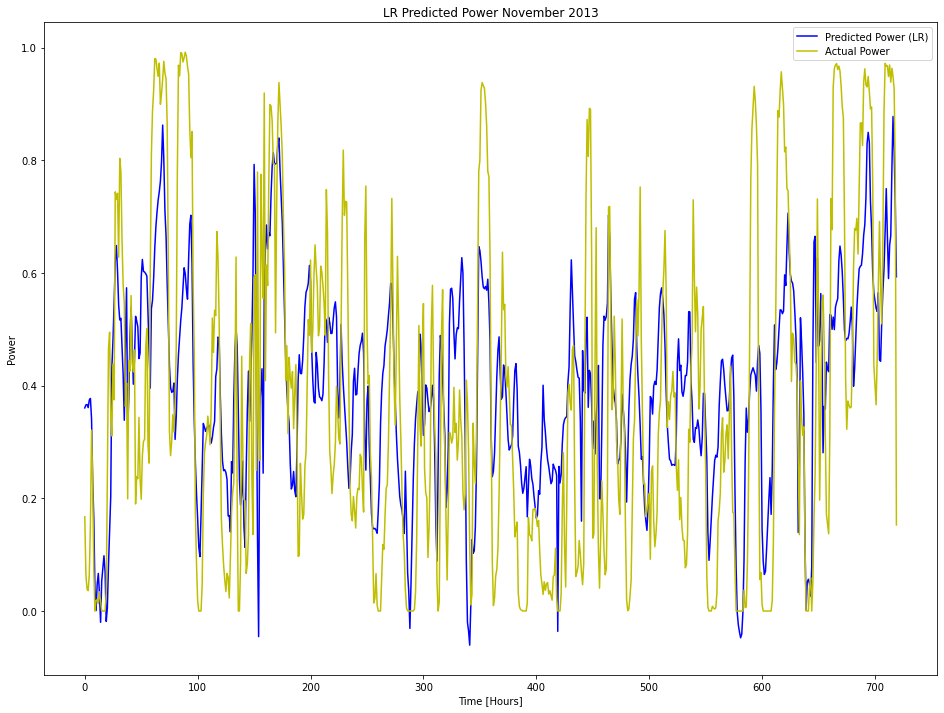

In [18]:
WFI['POWER'] = (WFI['WS10']*b1+b0)
WFI['ActPower'] = SOL['POWER']
WFI['Index'] = WFI.index

#display(WFI)

x = WFI['Index'].values
y_pred = WFI['POWER']
y_test = WFI['ActPower']

plt.plot(x,y_pred, color = 'b', label ='Predicted Power (LR)')
plt.plot(x,y_test, color = 'y', label ='Actual Power')
plt.legend()
plt.rcParams['figure.figsize'] = [16, 12]
plt.ylabel('Power')
plt.title('LR Predicted Power November 2013')
plt.xlabel('Time [Hours]')

#np.savetxt("ForecastTemplate1-LR.csv", y, delimiter=",")

In [20]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:",mse)
rmse = math.sqrt(mse)
print("Root Mean Squared Error LR:", rmse)

Mean Squared Error: 0.04682207251113721
Root Mean Squared Error LR: 0.21638408562354397


Text(0.5, 1.0, 'LR November Week 1')

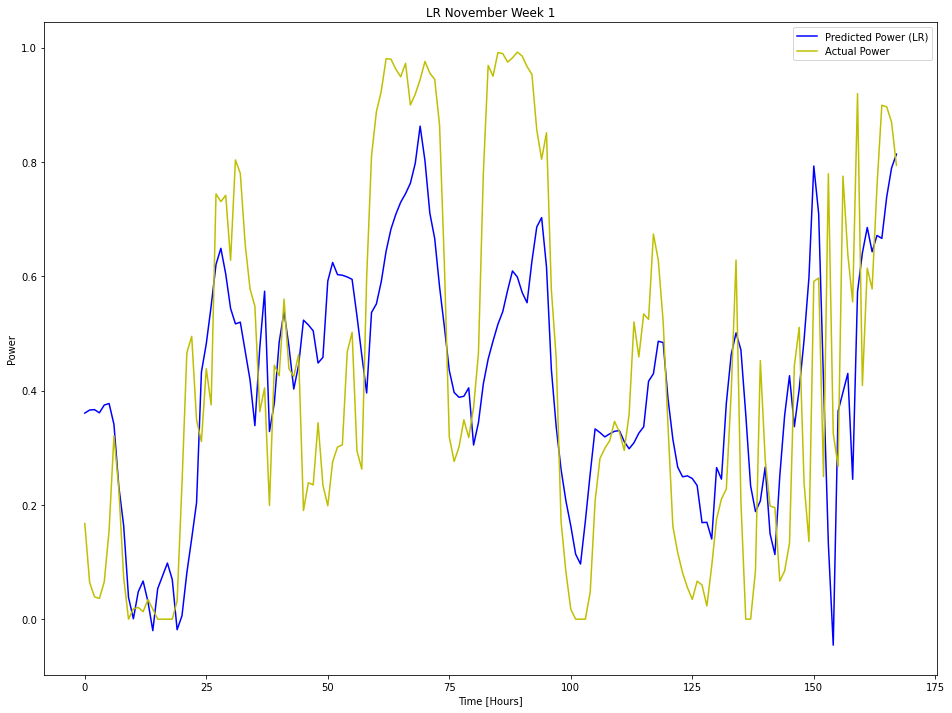

In [22]:
x_week_1 = WFI.iloc[0:168]['Index']
y_week_1 = WFI.iloc[0:168]['POWER']
y2_week_1 = WFI.iloc[0:168]['ActPower']

plt.plot(x_week_1,y_week_1, color = 'b', label ='Predicted Power (LR)')
plt.plot(x_week_1,y2_week_1, color = 'y', label ='Actual Power')
plt.legend()
plt.rcParams['figure.figsize'] = [16, 12]
plt.ylabel('Power')
plt.xlabel('Time [Hours]')
plt.title('LR November Week 1')

Text(0.5, 1.0, 'LR November Week 2')

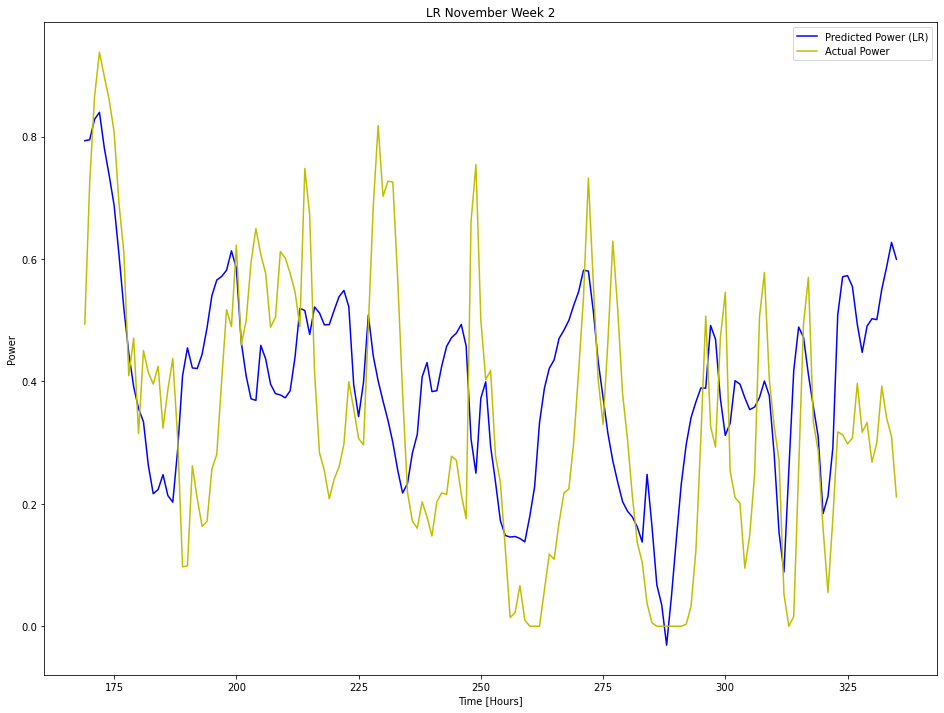

In [24]:
x_week_2 = WFI.iloc[169:336]['Index']
y_week_2 = WFI.iloc[169:336]['POWER']
y2_week_2 = WFI.iloc[169:336]['ActPower']

plt.plot(x_week_2,y_week_2, color = 'b', label ='Predicted Power (LR)')
plt.plot(x_week_2,y2_week_2, color = 'y', label ='Actual Power')
plt.legend()
plt.rcParams['figure.figsize'] = [16, 12]
plt.ylabel('Power')
plt.xlabel('Time [Hours]')
plt.title('LR November Week 2')

Text(0.5, 1.0, 'LR November Week 3')

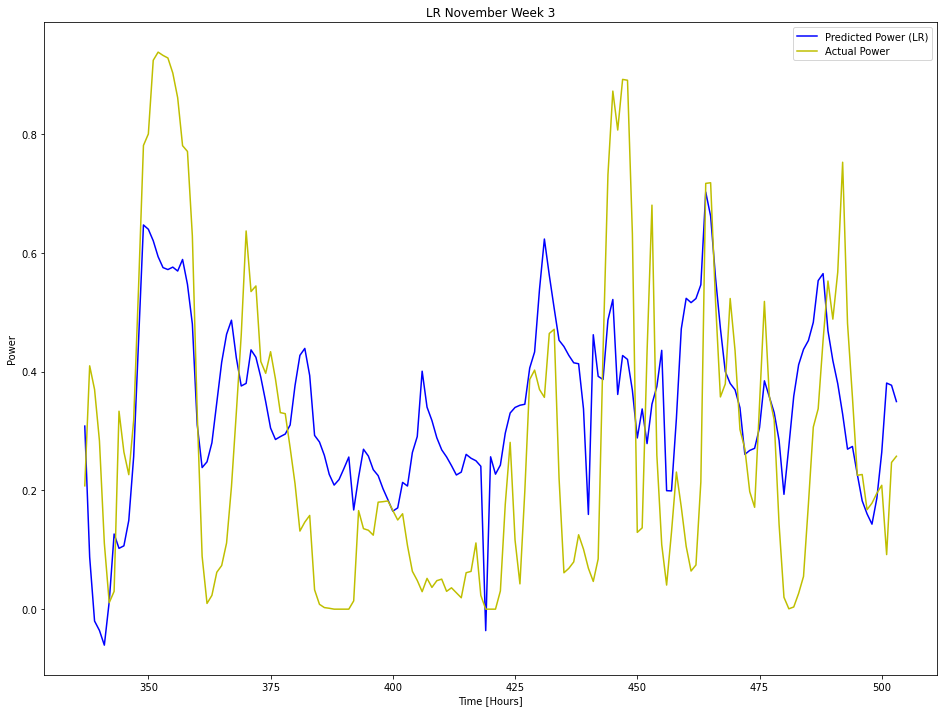

In [25]:
x_week_3 = WFI.iloc[337:504]['Index']
y_week_3 = WFI.iloc[337:504]['POWER']
y2_week_3 = WFI.iloc[337:504]['ActPower']

plt.plot(x_week_3,y_week_3, color = 'b', label ='Predicted Power (LR)')
plt.plot(x_week_3,y2_week_3, color = 'y', label ='Actual Power')
plt.legend()
plt.rcParams['figure.figsize'] = [16, 12]
plt.ylabel('Power')
plt.xlabel('Time [Hours]')
plt.title('LR November Week 3')

Text(0.5, 1.0, 'LR November Week 4')

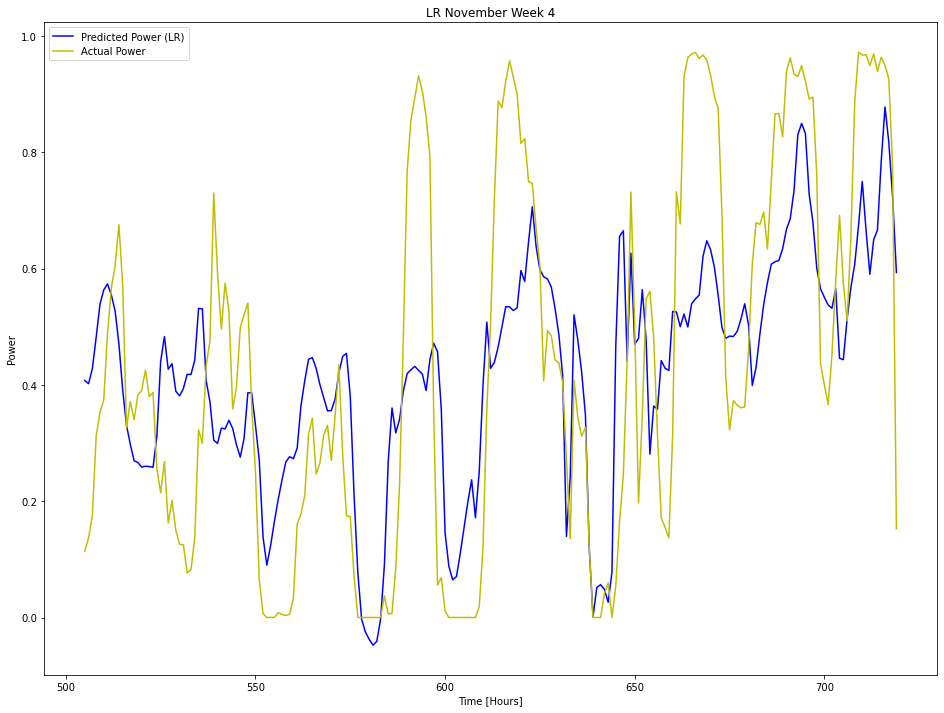

In [26]:
x_week_4 = WFI.iloc[505:720]['Index']
y_week_4 = WFI.iloc[505:720]['POWER']
y2_week_4 = WFI.iloc[505:720]['ActPower']

plt.plot(x_week_4,y_week_4, color = 'b', label ='Predicted Power (LR)')
plt.plot(x_week_4,y2_week_4, color = 'y', label ='Actual Power')
plt.legend()
plt.rcParams['figure.figsize'] = [16, 12]
plt.ylabel('Power')
plt.xlabel('Time [Hours]')
plt.title('LR November Week 4')

# kNN Method

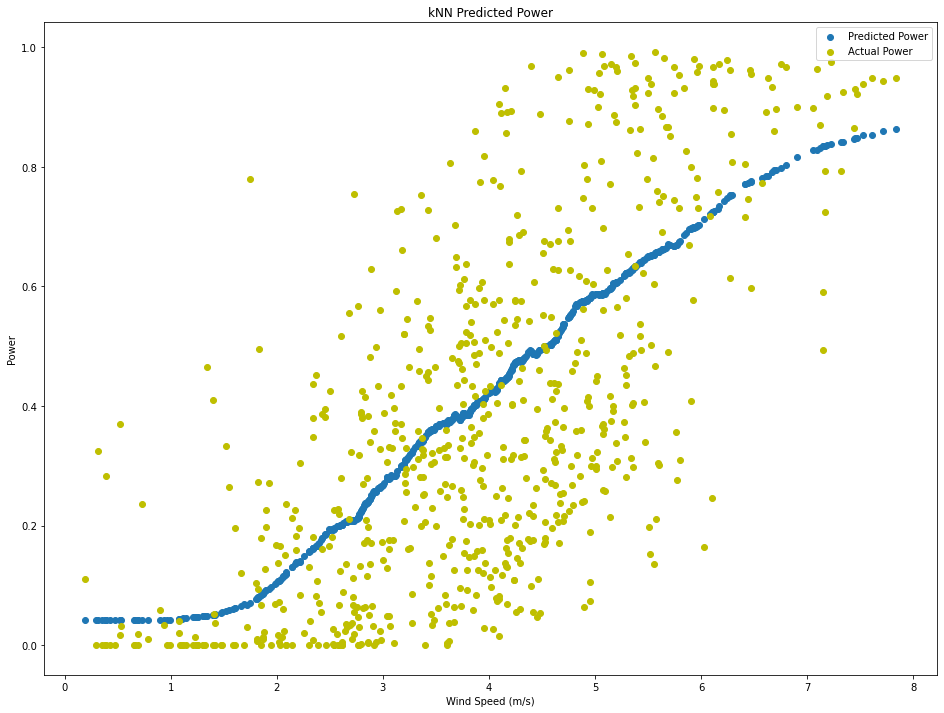

Mean Squared Error: 0.0468769567861126
Root Mean Squared Error kNN: 0.21651086990290488


In [31]:
KNN = TD.copy()
WFI_1 = pd.read_csv('WeatherForecastInput.csv')
SOL_1 = pd.read_csv('Solution.csv')
WFI_1['Index'] = WFI_1.index

WFI_1['POWER'] = SOL_1['POWER']

KNN = KNN[['TIMESTAMP', 'POWER', 'U10', 'V10', 'WS10']]
WFI_1 = WFI_1[['TIMESTAMP', 'POWER', 'U10', 'V10', 'WS10', 'Index']]

# KNN is train data
# WFI_1 is test data

X_train = KNN.iloc[:, 4].values #WS10
X_train = X_train.reshape(-1,1)
#X_train = KNN.iloc[:, 2:4].values #X_train is U10 and V10
y_train = KNN.iloc[:, 1].values #y_train is POWER
y_train = y_train.reshape(-1,1)

X_test = WFI_1.iloc[:, 4].values #WS10
X_test = X_test.reshape(-1,1)
#X_test = WFI_1.iloc[:, 2:4].values #X_test is U10 and V10
y_test = WFI_1.iloc[:, 1].values #y_test is POWER

from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
clf = KNeighborsRegressor(n_neighbors=1000)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

y_pred_kNN = y_pred

# https://stackoverflow.com/questions/41925157/logisticregression-unknown-label-type-continuous-using-sklearn-in-python

#x = WFI_1['TIMESTAMP']
x = WFI_1['WS10']
y = WFI_1['POWER']
plt.scatter(x,y_pred, label = 'Predicted Power')
plt.scatter(x, y, label = 'Actual Power', color = 'y')
#plt.plot(x, y_test, label = 'Actual Power')
plt.legend()
plt.rcParams['figure.figsize'] = [16, 12]
plt.ylabel('Power')
plt.xlabel('Wind Speed (m/s)')
plt.title('kNN Predicted Power')
plt.show()

from sklearn.metrics import mean_squared_error
import math

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:",mse)
rmse = math.sqrt(mse)
print("Root Mean Squared Error kNN:", rmse)

#np.savetxt("ForecastTemplate1-kNN.csv", y_pred, delimiter=",")

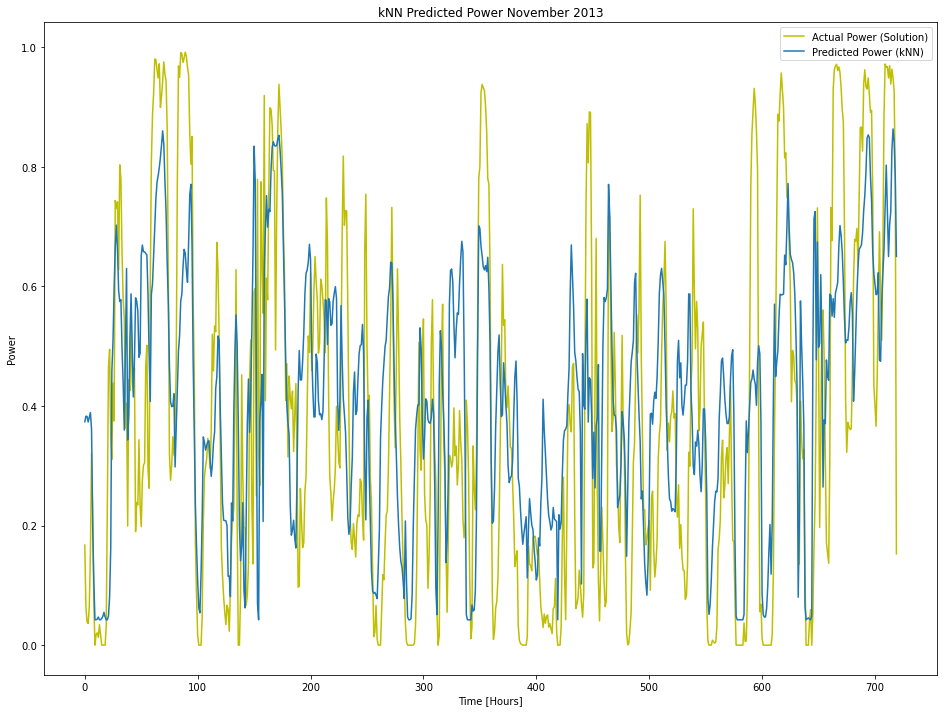

In [33]:
x1 = WFI_1.iloc[0:720]['Index']
y = WFI_1.iloc[0:720]['POWER']
y_2 = y_pred[0:720]
plt.plot(x1, y, label = 'Actual Power (Solution)', color = 'y')
plt.plot(x1, y_2, label = 'Predicted Power (kNN)')
plt.ylabel('Power')
plt.xlabel('Time [Hours]')
plt.title('kNN Predicted Power November 2013')
plt.legend()


#error = []

# Calculating error for K values between 1 and 40
#for i in range(1, 100):
#    knn = KNeighborsRegressor(n_neighbors=i)
#    knn.fit(X_train, y_train)
#    pred_i = knn.predict(X_test)
#    error.append(np.mean(pred_i != y_test))
    
#plt.figure(figsize=(12, 6))
#plt.plot(range(1, 100), error, color='red', linestyle='dashed', marker='o',markerfacecolor='blue', markersize=10)
#plt.title('Error Rate K Value')
#plt.xlabel('K Value')
#plt.ylabel('Mean Error')

Text(0.5, 1.0, 'kNN November Week 1')

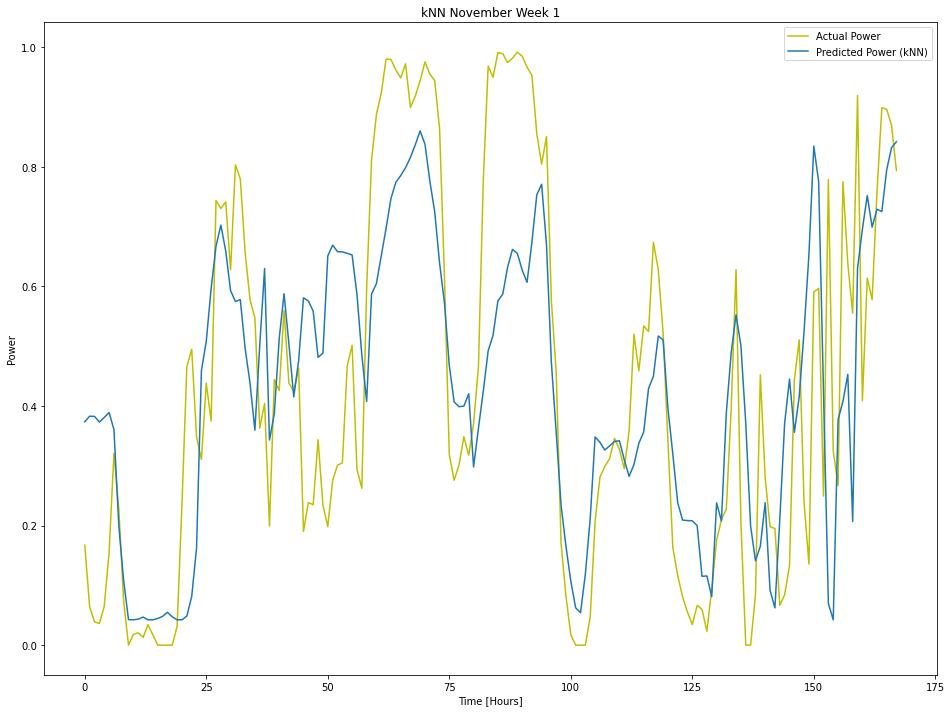

In [34]:
x_week_1 = WFI_1.iloc[0:168]['Index']
y_week_1 = WFI_1.iloc[0:168]['POWER']
y_pred_week_1 = y_pred[0:168]
plt.plot(x_week_1, y_week_1, label = 'Actual Power', color = 'y')
plt.plot(x_week_1, y_pred_week_1, label = 'Predicted Power (kNN)')
plt.ylabel('Power')
plt.xlabel('Time [Hours]')
plt.legend()
plt.title('kNN November Week 1')


Text(0.5, 1.0, 'kNN November Week 2')

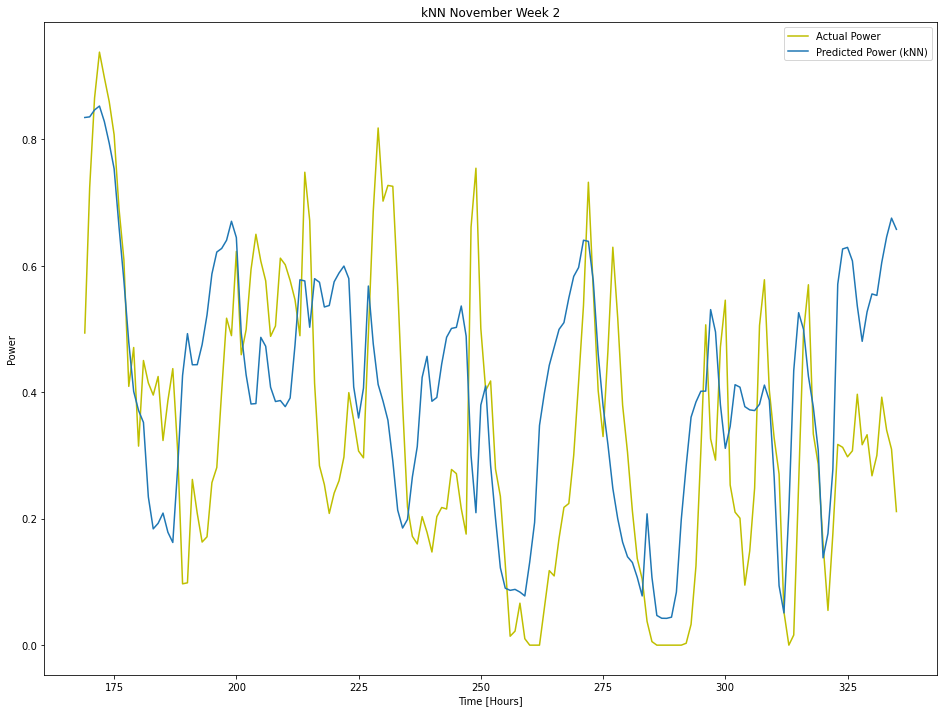

In [35]:
x_week_2 = WFI_1.iloc[169:336]['Index']
y_week_2 = WFI_1.iloc[169:336]['POWER']
y_pred_week_2 = y_pred[169:336]
plt.plot(x_week_2, y_week_2, label = 'Actual Power', color = 'y')
plt.plot(x_week_2, y_pred_week_2, label = 'Predicted Power (kNN)')
plt.ylabel('Power')
plt.xlabel('Time [Hours]')
plt.legend()
plt.title('kNN November Week 2')

Text(0.5, 1.0, 'kNN November Week 3')

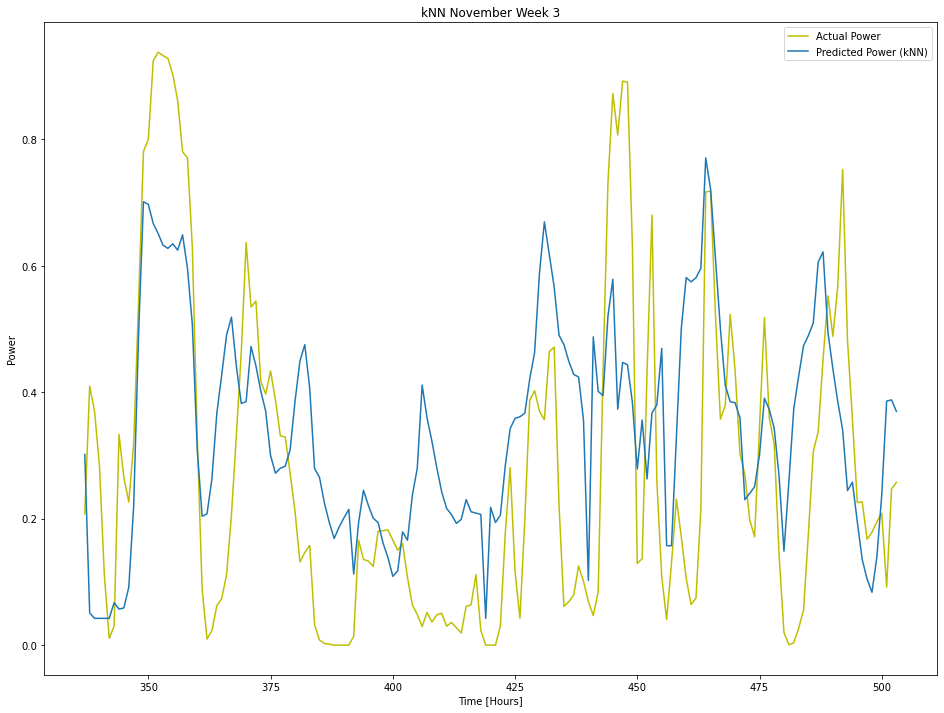

In [36]:
x_week_3 = WFI_1.iloc[337:504]['Index']
y_week_3 = WFI_1.iloc[337:504]['POWER']
y_pred_week_3 = y_pred[337:504]
plt.plot(x_week_3, y_week_3, label = 'Actual Power', color = 'y')
plt.plot(x_week_3, y_pred_week_3, label = 'Predicted Power (kNN)')
plt.ylabel('Power')
plt.xlabel('Time [Hours]')
plt.legend()
plt.title('kNN November Week 3')

Text(0.5, 1.0, 'kNN November Week 4')

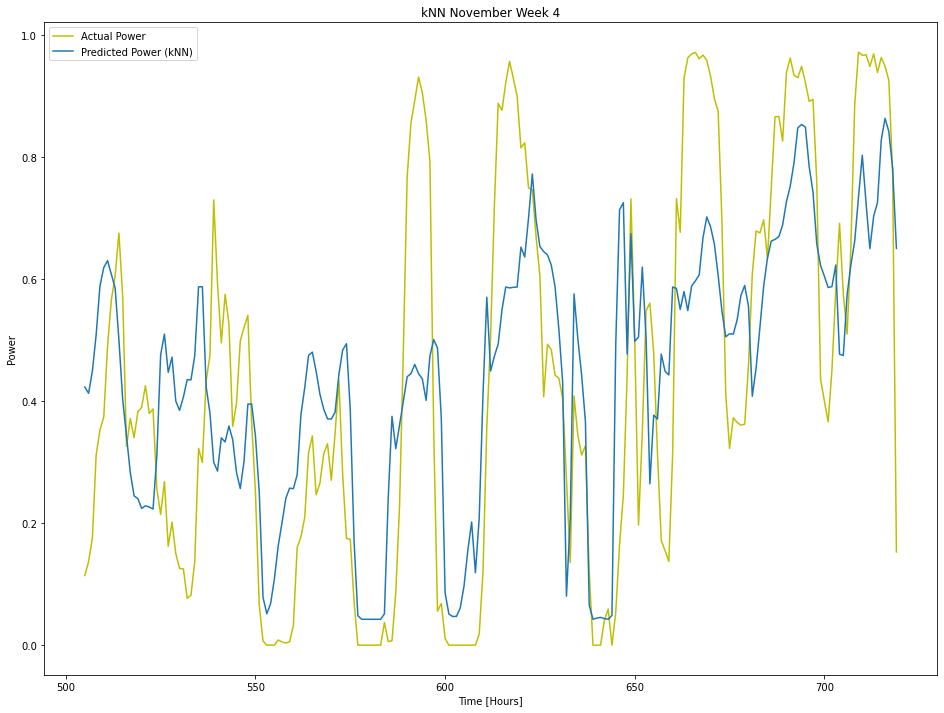

In [37]:
x_week_4 = WFI_1.iloc[505:720]['Index']
y_week_4 = WFI_1.iloc[505:720]['POWER']
y_pred_week_4 = y_pred[505:720]
plt.plot(x_week_4, y_week_4, label = 'Actual Power', color = 'y')
plt.plot(x_week_4, y_pred_week_4, label = 'Predicted Power (kNN)')
plt.ylabel('Power')
plt.xlabel('Time [Hours]')
plt.legend()
plt.title('kNN November Week 4')

# SVR

C:\Users\kaspe\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


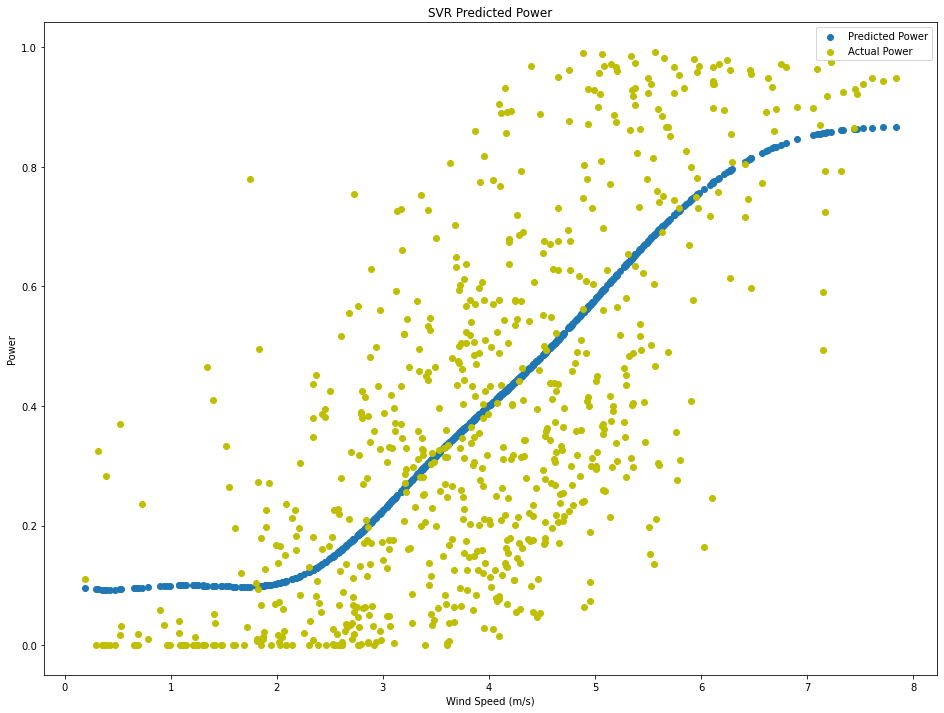

Mean Squared Error: 0.04567307790244441
Root Mean Squared Error SCR: 0.21371260585759655


In [38]:
from sklearn import metrics, svm

SVR = TD.copy()
WFI_2 = pd.read_csv('WeatherForecastInput.csv')
SOL_2 = pd.read_csv('Solution.csv')
WFI_2['Index'] = WFI_2.index

WFI_2['POWER'] = SOL_2['POWER']

SVR = SVR[['TIMESTAMP', 'POWER', 'U10', 'V10', 'WS10']]
WFI_2 = WFI_2[['TIMESTAMP', 'POWER', 'U10', 'V10', 'WS10','Index']]

# KNN is train data
# WFI_1 is test data

#X_train = SVR.iloc[:, 2:4].values #X_train is U10 and V10
X_train = SVR.iloc[:, 4].values #X_Train in WS10
X_train = X_train.reshape(-1, 1)
y_train = SVR.iloc[:, 1].values #y_train is POWER
y_train = y_train.reshape(-1, 1)

#X_test = WFI_2.iloc[:, 2:4].values #X_test is U10 and V10
X_test = WFI_2.iloc[:, 4].values #X_test is WS10
X_test = X_test.reshape(-1, 1)

y_test = WFI_2.iloc[:, 1].values #y_test is POWER from solution
y_test = y_test.reshape(-1, 1)

clf = svm.SVR()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

y_pred_SVR = y_pred

x = WFI_2['WS10']
#y = WFI_2['POWER']
plt.scatter(x,y_pred, label = 'Predicted Power')
plt.scatter(x, y_test, label = 'Actual Power', color = 'y')
#plt.plot(x, y_test, label = 'Actual Power')
plt.legend()
plt.rcParams['figure.figsize'] = [16, 12]
plt.ylabel('Power')
plt.xlabel('Wind Speed (m/s)')
plt.title('SVR Predicted Power')
plt.show()

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:",mse)
rmse = math.sqrt(mse)
print("Root Mean Squared Error SCR:", rmse)

#np.savetxt("ForecastTemplate1-SVR.csv", y_pred, delimiter=",")

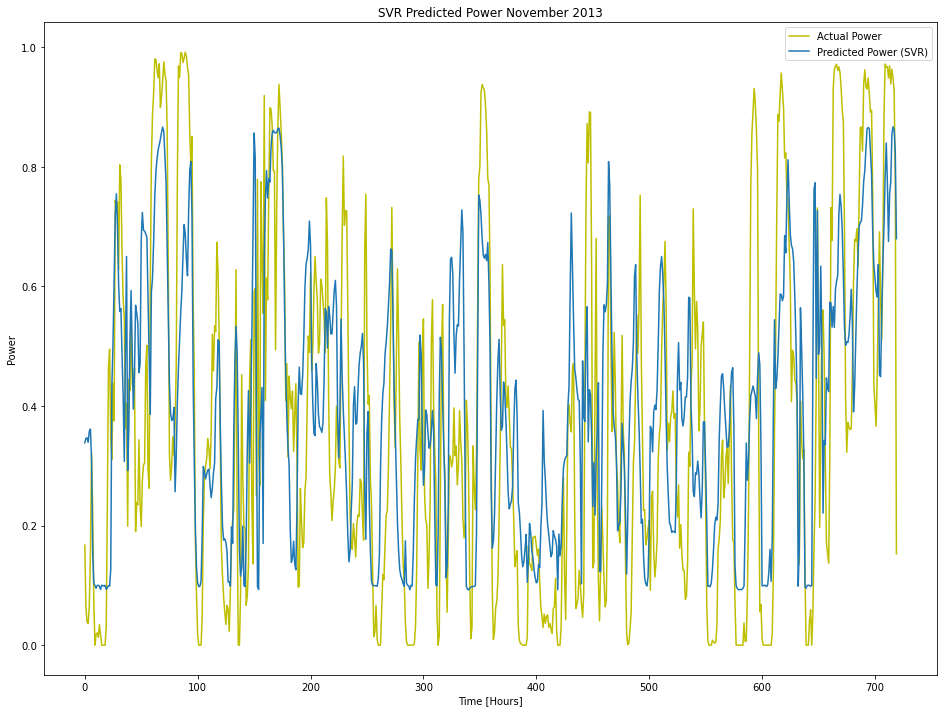

In [44]:
x1 = WFI_2['Index']
y = WFI_2['POWER']
y_3 = y_pred
plt.plot(x1, y, label = 'Actual Power', color = 'y')
plt.plot(x1, y_3, label = 'Predicted Power (SVR)')
plt.ylabel('Power')
plt.xlabel('Time [Hours]')
plt.title('SVR Predicted Power November 2013')
plt.legend()


Text(0.5, 1.0, 'SVR November Week 1')

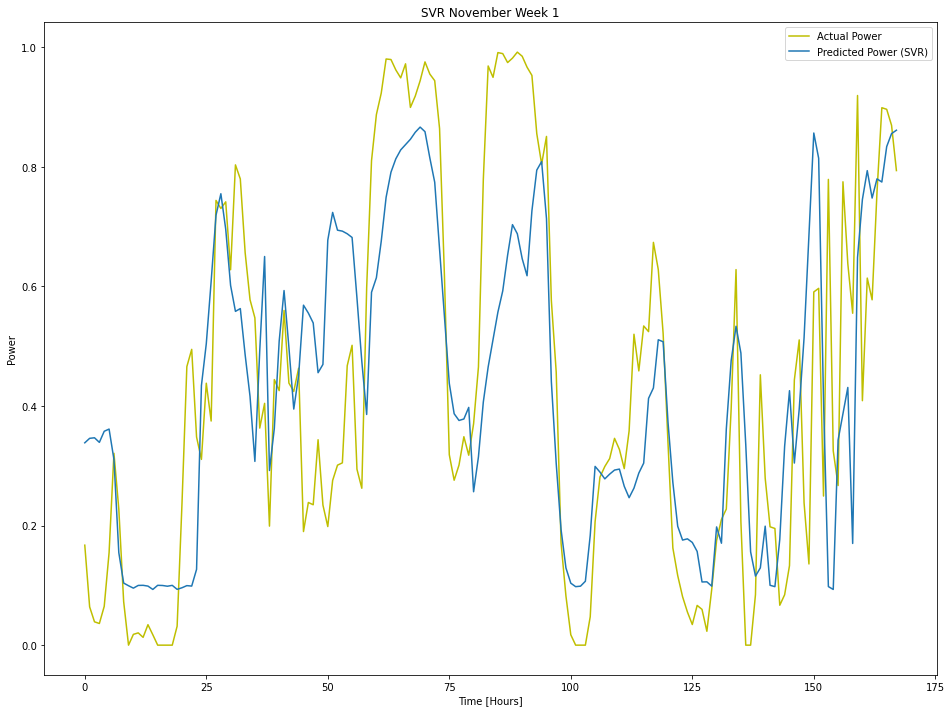

In [40]:
x_week_1 = WFI_2.iloc[0:168]['Index']
y_week_1 = WFI_2.iloc[0:168]['POWER']
y_pred_week_1 = y_pred[0:168]
plt.plot(x_week_1, y_week_1, label = 'Actual Power', color = 'y')
plt.plot(x_week_1, y_pred_week_1, label = 'Predicted Power (SVR)')
plt.ylabel('Power')
plt.xlabel('Time [Hours]')
plt.legend()
plt.title('SVR November Week 1')

Text(0.5, 1.0, 'SVR November Week 2')

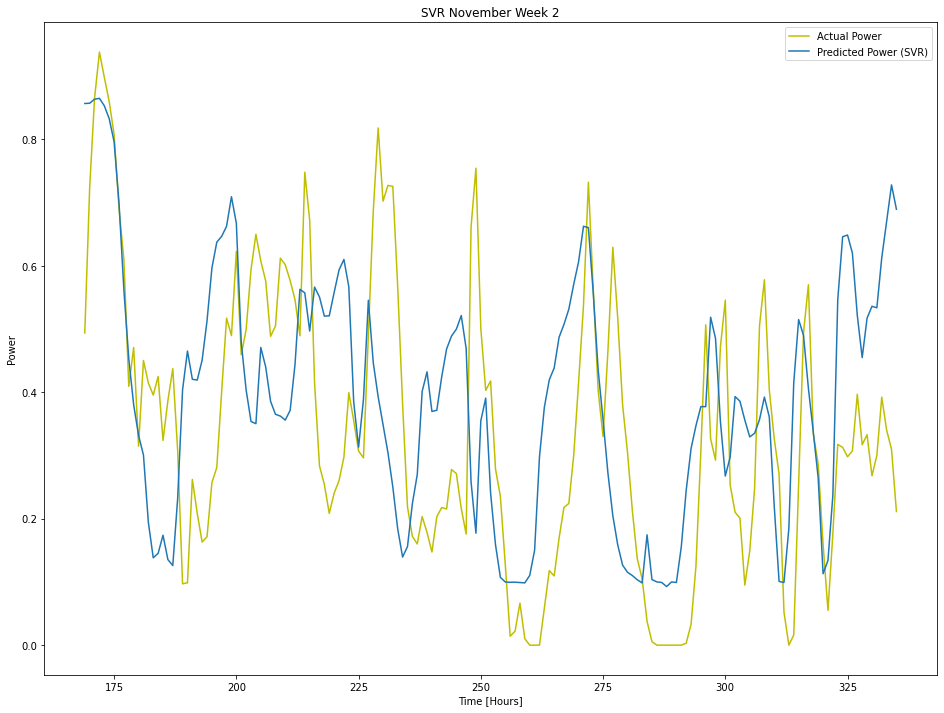

In [41]:
x_week_2 = WFI_2.iloc[169:336]['Index']
y_week_2 = WFI_2.iloc[169:336]['POWER']
y_pred_week_2 = y_pred[169:336]
plt.plot(x_week_2, y_week_2, label = 'Actual Power', color = 'y')
plt.plot(x_week_2, y_pred_week_2, label = 'Predicted Power (SVR)')
plt.ylabel('Power')
plt.xlabel('Time [Hours]')
plt.legend()
plt.title('SVR November Week 2')

Text(0.5, 1.0, 'SVR November Week 3')

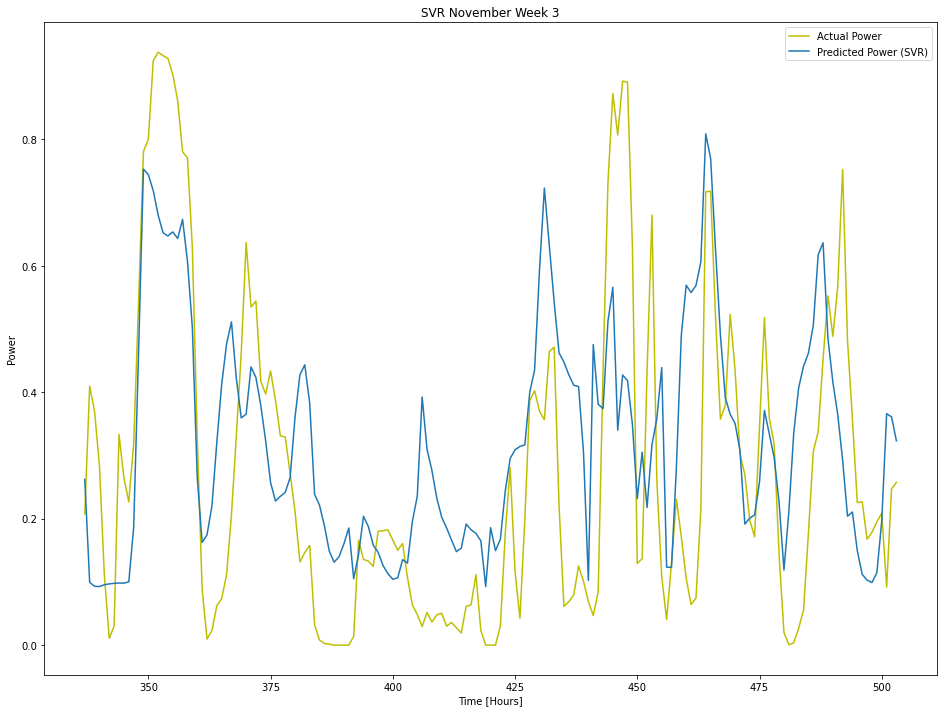

In [42]:
x_week_3 = WFI_2.iloc[337:504]['Index']
y_week_3 = WFI_2.iloc[337:504]['POWER']
y_pred_week_3 = y_pred[337:504]
plt.plot(x_week_3, y_week_3, label = 'Actual Power', color = 'y')
plt.plot(x_week_3, y_pred_week_3, label = 'Predicted Power (SVR)')
plt.ylabel('Power')
plt.xlabel('Time [Hours]')
plt.legend()
plt.title('SVR November Week 3')

Text(0.5, 1.0, 'SVR November Week 4')

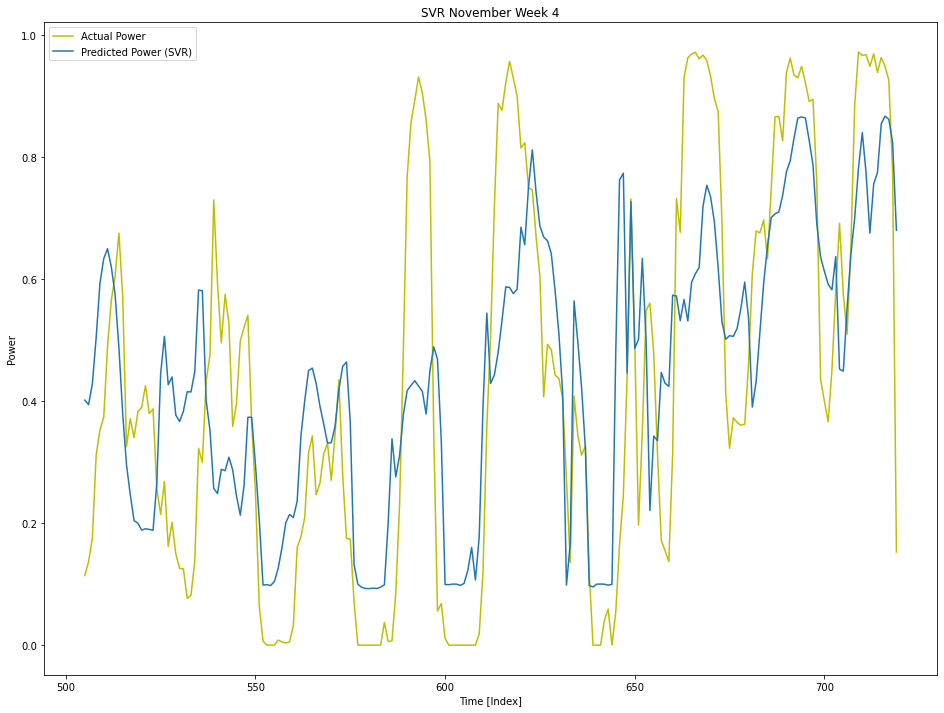

In [43]:
x_week_4 = WFI_2.iloc[505:720]['Index']
y_week_4 = WFI_2.iloc[505:720]['POWER']
y_pred_week_4 = y_pred[505:720]
plt.plot(x_week_4, y_week_4, label = 'Actual Power', color = 'y')
plt.plot(x_week_4, y_pred_week_4, label = 'Predicted Power (SVR)')
plt.ylabel('Power')
plt.xlabel('Time [Index]')
plt.legend()
plt.title('SVR November Week 4')

# Artificial Neural Network

C:\Users\kaspe\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


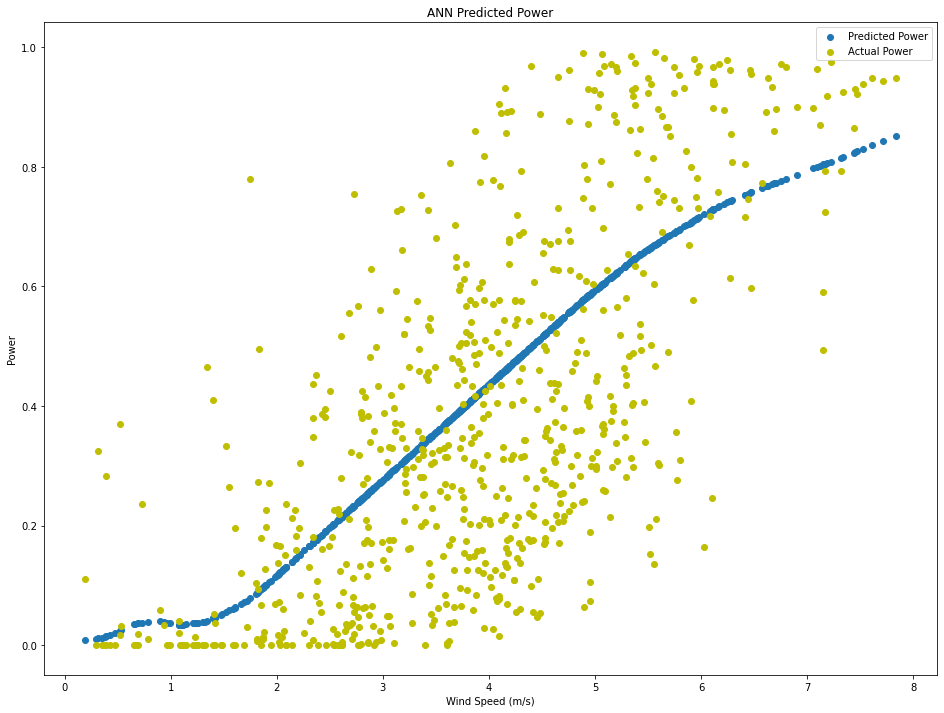

Mean Squared Error: 0.04803083338805418
Root Mean Squared Error ANN: 0.2191593789643833


In [45]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
import math


ANN = TD.copy()

WFI_3 = pd.read_csv('WeatherForecastInput.csv')
SOL_3 = pd.read_csv('Solution.csv')
WFI_3['Index'] = WFI_3.index

WFI_3['POWER'] = SOL_3['POWER']

ANN = ANN[['TIMESTAMP', 'POWER', 'U10', 'V10', 'WS10']]
WFI_3 = WFI_3[['TIMESTAMP', 'POWER', 'U10', 'V10', 'WS10','Index']]

# KNN is train data
# WFI_1 is test data

X_train = ANN.iloc[:, 4].values #X_Train in WS10
X_train = X_train.reshape(-1, 1)
y_train = ANN.iloc[:, 1].values #y_train is POWER
y_train = y_train.reshape(-1, 1)

X_test = WFI_3.iloc[:, 4].values #X_test is WS10
X_test = X_test.reshape(-1, 1)

y_test = WFI_3.iloc[:, 1].values #y_test is POWER from solution
y_test = y_test.reshape(-1, 1)

mlp = MLPRegressor(max_iter = 1000, activation = 'relu')
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)

y_pred_ANN = y_pred

x = WFI_3['WS10']
plt.scatter(x,y_pred, label = 'Predicted Power')
plt.scatter(x, y_test, label = 'Actual Power', color = 'y')
#plt.plot(x, y_test, label = 'Actual Power')
plt.legend()
plt.rcParams['figure.figsize'] = [16, 12]
plt.ylabel('Power')
plt.xlabel('Wind Speed (m/s)')
plt.title('ANN Predicted Power')
plt.show()

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:",mse)
rmse = math.sqrt(mse)
print("Root Mean Squared Error ANN:", rmse)

#np.savetxt("ForecastTemplate1-ANN.csv", y_pred, delimiter=",")

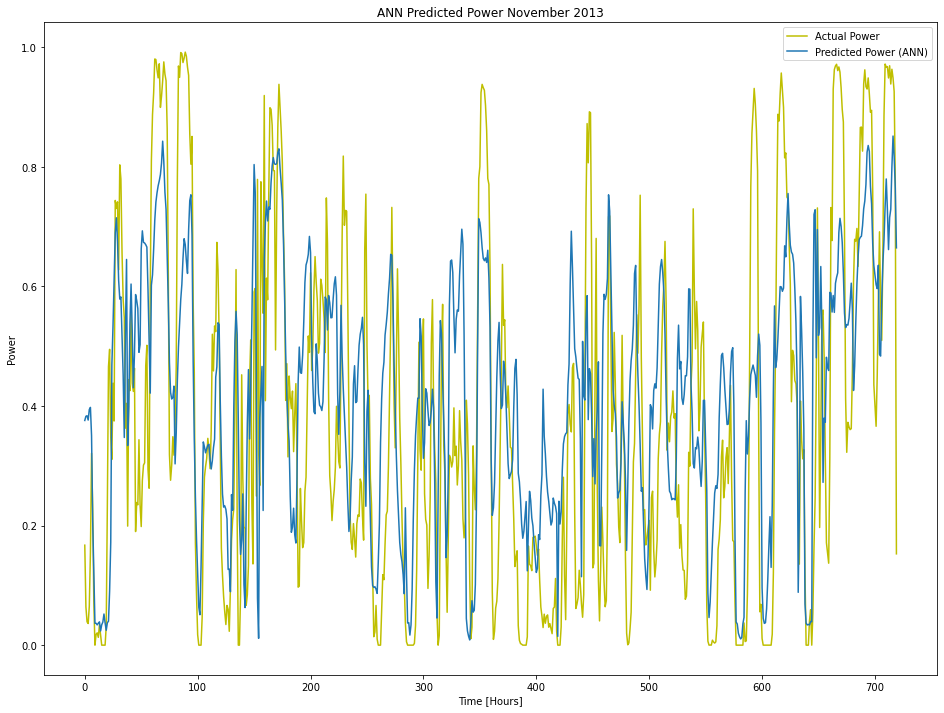

In [46]:
x1 = WFI_3['Index']
y = WFI_3['POWER']
y_4 = y_pred
plt.plot(x1, y, label = 'Actual Power', color = 'y')
plt.plot(x1, y_4, label = 'Predicted Power (ANN)')
plt.ylabel('Power')
plt.xlabel('Time [Hours]')
plt.title('ANN Predicted Power November 2013')
plt.legend()

Text(0.5, 1.0, 'ANN November Week 1')

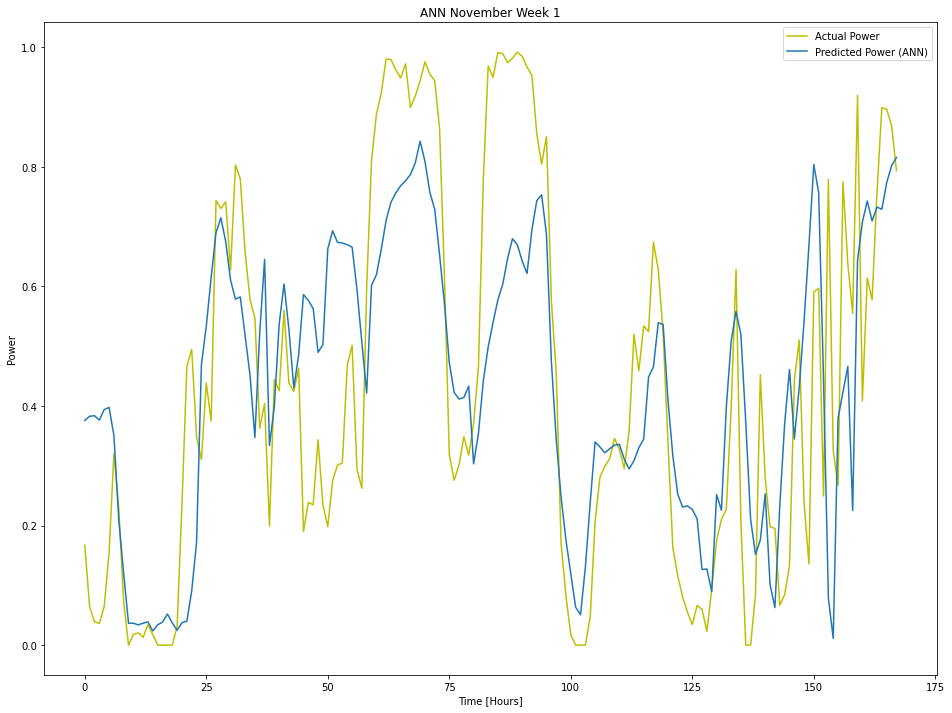

In [48]:
x_week_1 = WFI_3.iloc[0:168]['Index']
y_week_1 = WFI_3.iloc[0:168]['POWER']
y_pred_week_1 = y_pred[0:168]
plt.plot(x_week_1, y_week_1, label = 'Actual Power', color = 'y')
plt.plot(x_week_1, y_pred_week_1, label = 'Predicted Power (ANN)')
plt.ylabel('Power')
plt.xlabel('Time [Hours]')
plt.legend()
plt.title('ANN November Week 1')

Text(0.5, 1.0, 'ANN November Week 2')

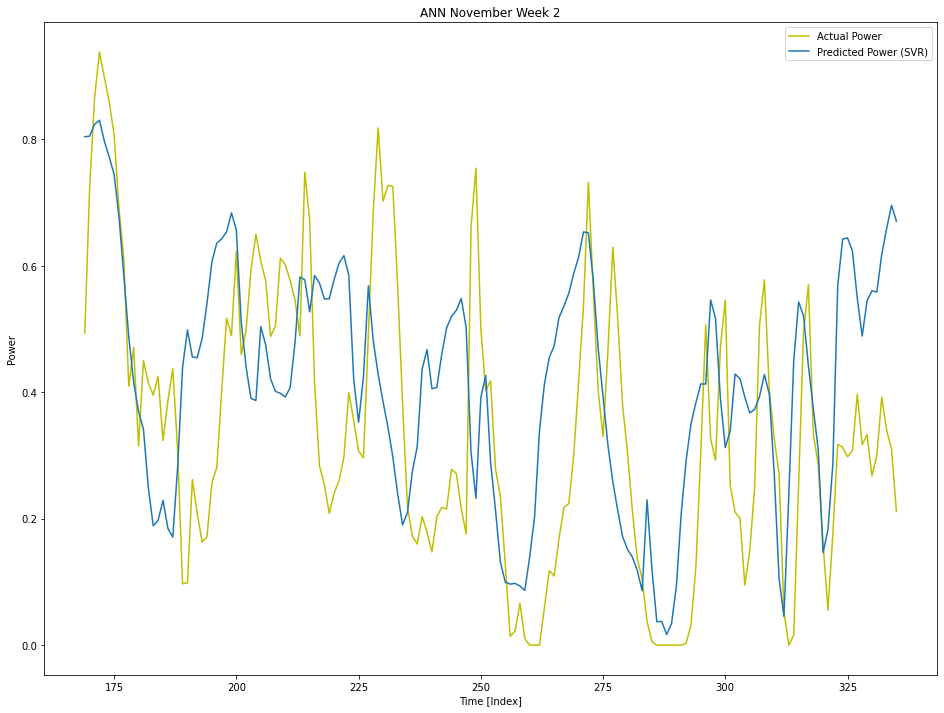

In [49]:
x_week_2 = WFI_3.iloc[169:336]['Index']
y_week_2 = WFI_3.iloc[169:336]['POWER']
y_pred_week_2 = y_pred[169:336]
plt.plot(x_week_2, y_week_2, label = 'Actual Power', color = 'y')
plt.plot(x_week_2, y_pred_week_2, label = 'Predicted Power (SVR)')
plt.ylabel('Power')
plt.xlabel('Time [Index]')
plt.legend()
plt.title('ANN November Week 2')

Text(0.5, 1.0, 'ANN November Week 3')

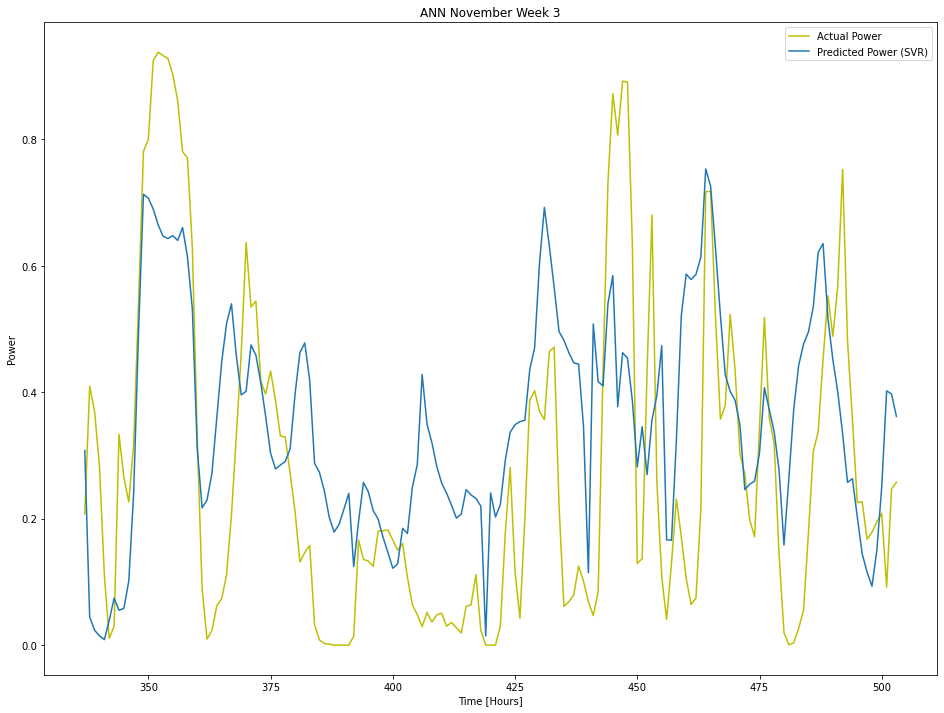

In [50]:
x_week_3 = WFI_3.iloc[337:504]['Index']
y_week_3 = WFI_3.iloc[337:504]['POWER']
y_pred_week_3 = y_pred[337:504]
plt.plot(x_week_3, y_week_3, label = 'Actual Power', color = 'y')
plt.plot(x_week_3, y_pred_week_3, label = 'Predicted Power (SVR)')
plt.ylabel('Power')
plt.xlabel('Time [Hours]')
plt.legend()
plt.title('ANN November Week 3')

Text(0.5, 1.0, 'ANN November Week 4')

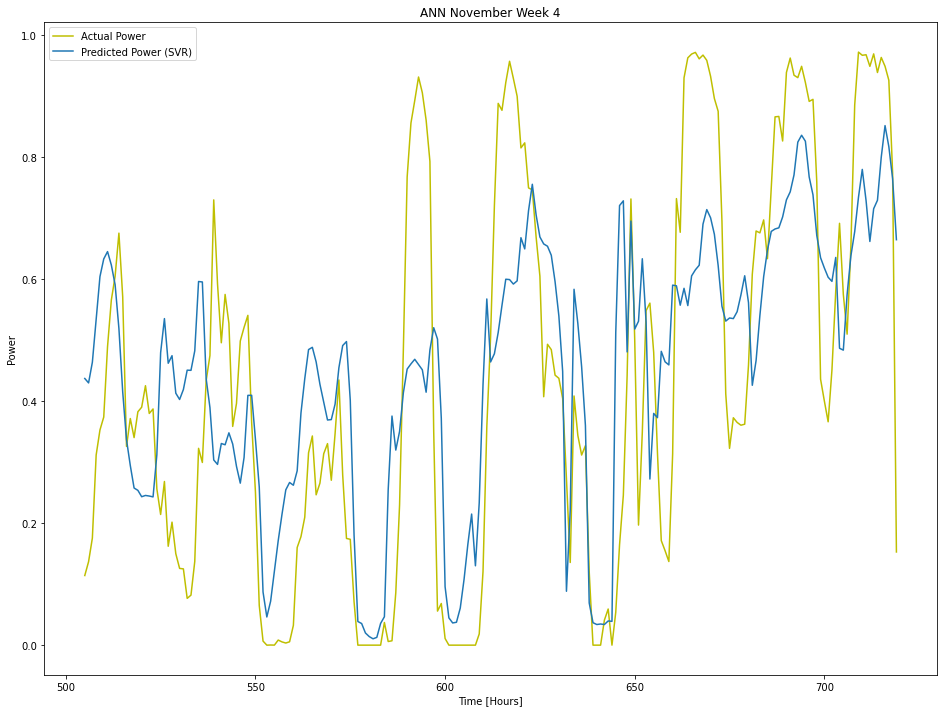

In [51]:
x_week_4 = WFI_3.iloc[505:720]['Index']
y_week_4 = WFI_3.iloc[505:720]['POWER']
y_pred_week_4 = y_pred[505:720]
plt.plot(x_week_4, y_week_4, label = 'Actual Power', color = 'y')
plt.plot(x_week_4, y_pred_week_4, label = 'Predicted Power (SVR)')
plt.ylabel('Power')
plt.xlabel('Time [Hours]')
plt.legend()
plt.title('ANN November Week 4')

Text(0, 0.5, 'Power')

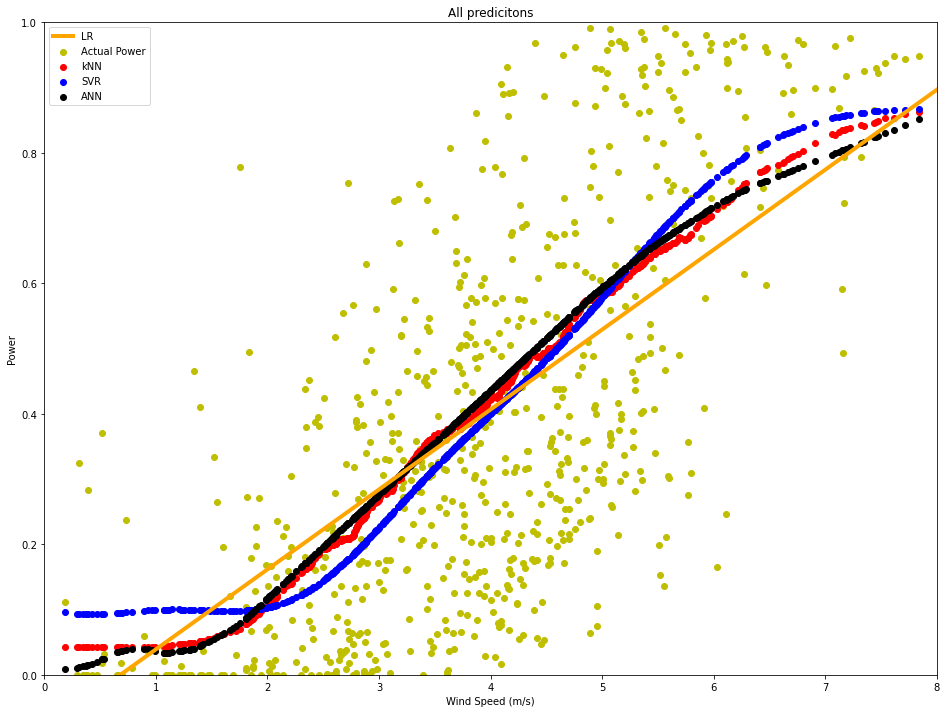

In [52]:
x = WFI_1['WS10']
x1 = np.linspace(min_x, max_x, 10)
y = WFI_1['POWER']
y1 = b0 + b1*x1
y2 = y_pred_kNN
y3 = y_pred_SVR
y4 = y_pred_ANN

plt.scatter(x,y, color = 'y', label = 'Actual Power')
plt.plot(x1,y1, color = 'orange', label = 'LR',linewidth = 4)
plt.scatter(x,y2, color = 'r', label = 'kNN')
plt.scatter(x,y3, color = 'b', label = 'SVR')
plt.scatter(x,y4, color = 'black', label = 'ANN')
plt.xlim(0,8)
plt.ylim(0,1)
plt.legend()
plt.title('All predicitons')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Power')